<a href="https://colab.research.google.com/github/russmendez/DS_notebooks/blob/master/A_B_Global__Crop_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

A growing demand requires a growing supply. This simple concept poses a great concern when it comes to the question of feeding our planet. The more people there are, the more land we will need to feed those people. The more land we will need to feed those people, the less land there will be for those people. Are we approaching a 'critical mass'? Are we running out of land? In this project we will examine the global crop production of four major crops to explore this question.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import relevent libraries/packages

In [2]:
from google.colab import files
import os
# NC4 libraries
!pip install netCDF4 
import netCDF4 as netcdf
from netCDF4 import Dataset
#Dateframe manipulation libraries 
from numpy import dtype
import pandas as pd
import xarray as xr
#Plotting libraries 
%matplotlib inline
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

The data for each year is stored in an individual table. The first step is to combine the data together in a usful manor. Initially I was going to use either MERGE or JOIN
and to do this I first made a table, 'key', to act as the LEFT KEY. However, I realized that it would be easier to make a FOR loop that added the 'var' (annual growth per hectare) sequentially.
This also made renaming the columns by year easier. This procosses is run for each crop creating four individual tables containg global crop production per square-area by year.
  



The code below is broken into 3 parts and is used for each crop individually 

1. This code crates a table with the index, lat and lon values.
2.This code pulls the 'var' column, containing the tonnes of yeild per hectare, and adds it to the key table by year. 
3.Finally, I remove all NaNs to make for easier analysis. 

In [3]:
ds = xr.open_dataset('drive/My Drive/gdhy_data/soybean/yield_1981.nc4')
df = ds.to_dataframe()
df = df.reset_index()
key = df.iloc[: , 0:2]

date = 1981
for x in range (0, 36):
  ds = xr.open_dataset('drive/My Drive/gdhy_data/soybean/yield_{}.nc4'.format(date))
  df = ds.to_dataframe()
  df = df.reset_index()
  data = df[['var']]
  key['{}'.format(date)] = data
  date = date+1

s = key
#s

In [4]:
s.head()

,lat,lon,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,-89.75,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.75,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.75,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-89.75,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-89.75,2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note**: The records of crops produced are stored in a grid based on longitude and latitude. Conceptually, these units of land are the same as acres or hectares. I will refer to them as Square-Areas, but they could also be called hectares for convenience.

In [5]:
# repeat for wheat 

ds = xr.open_dataset('drive/My Drive/gdhy_data/wheat/yield_1981.nc4')
df = ds.to_dataframe()
df = df.reset_index()
key = df.iloc[: , 0:2]

date = 1981
for x in range (0, 36):
  ds = xr.open_dataset('drive/My Drive/gdhy_data/wheat/yield_{}.nc4'.format(date))
  df = ds.to_dataframe()
  df = df.reset_index()
  data = df[['var']]
  key['{}'.format(date)] = data
  date = date+1

w = key
#w

In [6]:
# repeat for rice
ds = xr.open_dataset('drive/My Drive/gdhy_data/rice/yield_1981.nc4')
df = ds.to_dataframe()
df = df.reset_index()
key = df.iloc[: , 0:2]

date = 1981
for x in range (0, 36):
  ds = xr.open_dataset('drive/My Drive/gdhy_data/rice/yield_{}.nc4'.format(date))
  df = ds.to_dataframe()
  df = df.reset_index()
  data = df[['var']]
  key['{}'.format(date)] = data
  date = date+1

r = key
#r

In [7]:
# repeat for maize

ds = xr.open_dataset('drive/My Drive/gdhy_data/maize/yield_1981.nc4')
df = ds.to_dataframe()
df = df.reset_index()
key = df.iloc[: , 0:2]

date = 1981
for x in range (0, 36):
  ds = xr.open_dataset('drive/My Drive/gdhy_data/maize/yield_{}.nc4'.format(date))
  df = ds.to_dataframe()
  df = df.reset_index()
  data = df[['var']]
  key['{}'.format(date)] = data
  date = date+1

m = key
#m

The first step is to take the mean of all global production for a crop by year, the year, and the count of square-areas used. This is done with a FOR loop that appends the mean by year, the COUNT, and the year to one df per crop.

In [8]:
soy_list = []
for year in s.columns[3:-1]: 
  soy_list.append([year, s[year].count(), s[year].mean()])

soy_df = pd.DataFrame(soy_list)

soy_df.head()

,0,1,2
0,1982,6109,1.644824
1,1983,6111,1.658170
2,1984,6108,1.719970
3,1985,6111,1.847896
4,1986,6108,1.816722


In [9]:
wheat_list = []
for year in w.columns[3:-1]: 
  wheat_list.append([year, w[year].count(), w[year].mean()])

wheat_df = pd.DataFrame(wheat_list)

#wheat_df

In [10]:
rice_list = []
for year in r.columns[3:-1]: 
  rice_list.append([year, r[year].count(), r[year].mean()])

rice_df = pd.DataFrame(rice_list)

#rice_df

In [11]:
maize_list = []
for year in m.columns[3:-1]: 
  maize_list.append([year, m[year].count(), m[year].mean()])

maize_df = pd.DataFrame(maize_list)

#maize_df

#EDA and A/B testing

The descriptice check indicates the mean production is within normal distribution. 

In [12]:
print('soy descriprion: {}'.format(stats.describe(soy_df[2])))
print('wheat descriprion: {}'.format(stats.describe(wheat_df[2])))
print('rice descriprion: {}'.format(stats.describe(rice_df[2])))
print('maize descriprion: {}'.format(stats.describe(maize_df[2])))

soy descriprion: DescribeResult(nobs=34, minmax=(1.6448242664337158, 2.4899697303771973), mean=2.121405033504262, variance=0.06438633693898921, skewness=-0.33501007313338715, kurtosis=-1.0754432291278204)
wheat descriprion: DescribeResult(nobs=34, minmax=(3.048541307449341, 4.190497875213623), mean=3.5268111018573536, variance=0.0954703660605824, skewness=0.6315403857442701, kurtosis=-0.5934811295476701)
rice descriprion: DescribeResult(nobs=34, minmax=(3.2981224060058594, 5.4573540687561035), mean=4.26640858369715, variance=0.37979501884534006, skewness=0.2423027707788978, kurtosis=-0.9472551451500486)
maize descriprion: DescribeResult(nobs=34, minmax=(2.533698081970215, 5.523610591888428), mean=3.7071303409688614, variance=0.5566298521230306, skewness=0.5412546848342789, kurtosis=-0.4533578600363648)


The Shapiro Wilk test for the mean indicate we reject the null hypothesis for soy and wheat and we accept it for rice and maize, meaning that we can treat rice and maize as having normally distributed mean production. As we want to compare all four crops to each other we will use non-parametric tests.  

In [13]:
print('soy sharpio: {}'.format(stats.shapiro(soy_df[2])))
print('wheat sharpio: {}'.format(stats.shapiro(wheat_df[2])))
print('rice sharpio: {}'.format(stats.shapiro(rice_df[2])))
print('maize sharpio: {}'.format(stats.shapiro(maize_df[2])))

soy sharpio: (0.9372854828834534, 0.051206085830926895)
wheat sharpio: (0.9374247789382935, 0.05169493705034256)
rice sharpio: (0.9620159268379211, 0.2781226933002472)
maize sharpio: (0.9602242112159729, 0.24683895707130432)


Next, the data is visuallized. The next two cells contain (1) a combined histogram of all four crops and (2) histograms of all four crops individually. 
The third cell contains a plot of the annual average production over the 34 year measuring period. 

Text(0.5, 0, 'Mean Production')

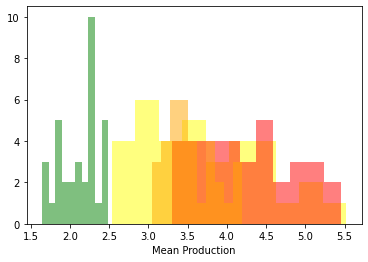

In [14]:
plt.hist(soy_df[2], color = 'green', alpha=.5)
plt.hist(maize_df[2], color = 'yellow', alpha=.5)
plt.hist(rice_df[2], color = 'red', alpha=.5)
plt.hist(wheat_df[2], color = 'orange', alpha=.5)
plt.xlabel('Mean Production')

Text(0.5, 1.0, 'Wheat')

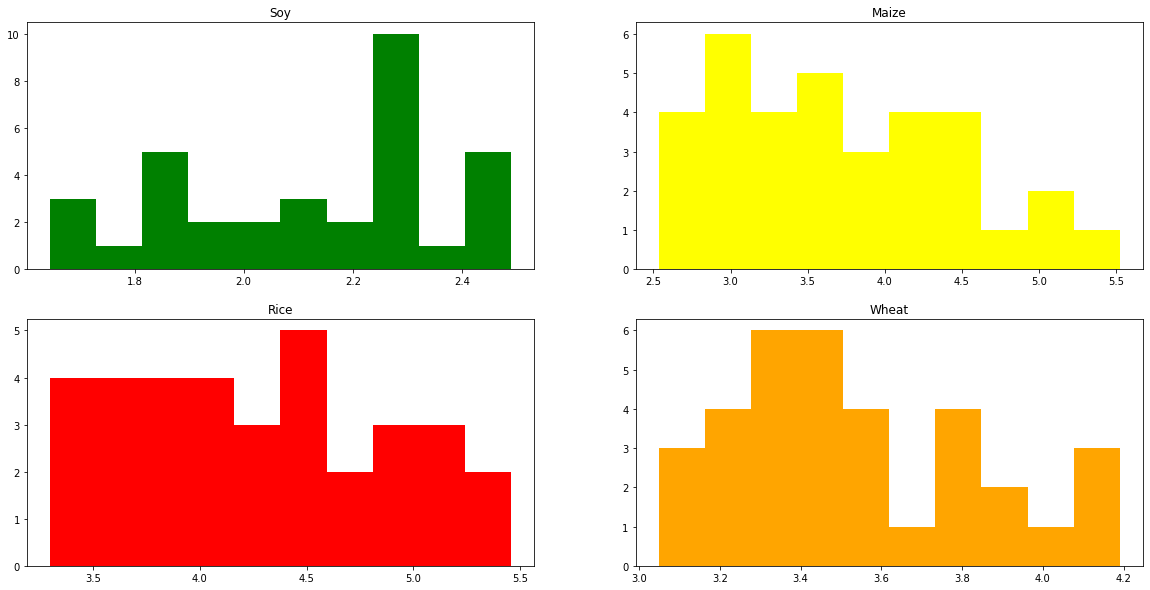

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(soy_df[2], color = 'green')
plt.title('Soy')
plt.subplot(2,2,2)
plt.hist(maize_df[2], color = 'yellow')
plt.title('Maize')
plt.subplot(2,2,3)
plt.hist(rice_df[2], color = 'red')
plt.title('Rice')
plt.subplot(2,2,4)
plt.hist(wheat_df[2], color = 'orange')
plt.title('Wheat')

The histograms do not appear to show a normal distribution. Additionally, they do not represent time in their depiction. What we can infer, which is more clearly visuallized in the plot,
is that overall production of rice has always been the greatest, followed by maize( corn), wheat, and soy bean respectively. The plot further shows that in the mid 80's the production of corn bypassed that of wheat in the 2010's. It bypassed rice to become the most produced of the four crops. Moreover, the plot shows a continual increase in global production for all four crops
all of which have almost doubled in the 36 year measurment period. 

Text(0.5, 1.0, 'Priduction over Time')

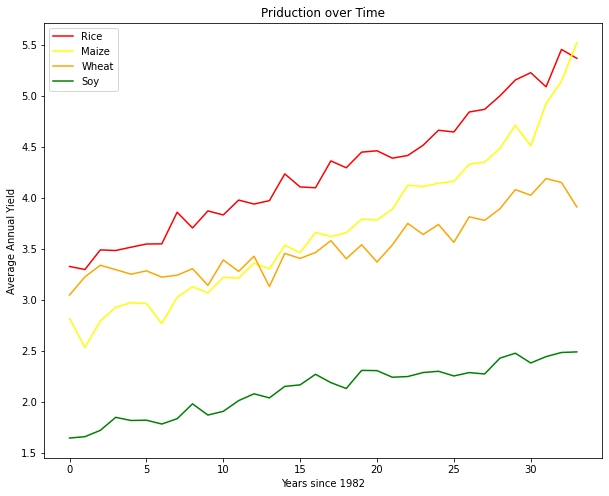

In [16]:
plt.figure(figsize=(10,8))
plt.plot(rice_df[2], 'red', label = 'Rice')
plt.plot(maize_df[2], 'yellow', label = 'Maize')
plt.plot(wheat_df[2], 'orange', label = 'Wheat')
plt.plot(soy_df[2], 'green', label = 'Soy')

plt.legend(loc = 'upper left')

plt.ylabel('Average Annual Yield')
plt.xlabel('Years since 1982')

plt.title('Priduction over Time')

Based on a kruskal test for all four crop means we can reject the null that all the crops have the same distribution. However, running a kruskal test on each pair indicates that we can in fact accept the null for wheat and maize and conclued they have a similar distribution.

In [ ]:
stats.kruskal(soy_df[2], wheat_df[2], rice_df[2], maize_df[2])

KruskalResult(statistic=89.34613441770017, pvalue=3.02686521299081e-19)

In [17]:
!pip install scikit_posthocs
import scikit_posthocs as sp

     |████████████████████████████████| 51kB 2.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-cp37-none-any.whl size=37903 sha256=9d4556636f3fd1cfb4a7c5134465f5c9480d52e9d4a65e3f70eaa6e7986c7970
  Stored in directory: /root/.cache/pip/wheels/00/0f/56/897c22820a48a74f50f1a85faaa4b133bb8865e8b094b596f5
Successfully built scikit-posthocs


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
a = [soy_df[2].values, wheat_df[2].values, maize_df[2].values, rice_df[2].values]
sp.posthoc_dunn(a)

,1,2,3,4
1,1.000000e+00,1.179124e-08,1.048436e-10,4.175471e-20
2,1.179124e-08,1.000000e+00,4.490022e-01,5.000688e-04
3,1.048436e-10,4.490022e-01,1.000000e+00,6.456685e-03
4,4.175471e-20,5.000688e-04,6.456685e-03,1.000000e+00


This ends the preliminary analysis of the data. As we expected, global crop production increased over the 34 year measuring period. We also discovered that only maize and wheat are significantly related in their mean production. What this tells us is that maize and wheat are produced in similar quantities and the graph further shows that they are the two most produced crops of the four. The next question we will address is how much land will we need for the coming years?

We will look at a count of the amount of square-areas being used to determine a prediction for how much land will be needed in the future.

Text(0.5, 1.0, 'Square Area used with Mean Production')

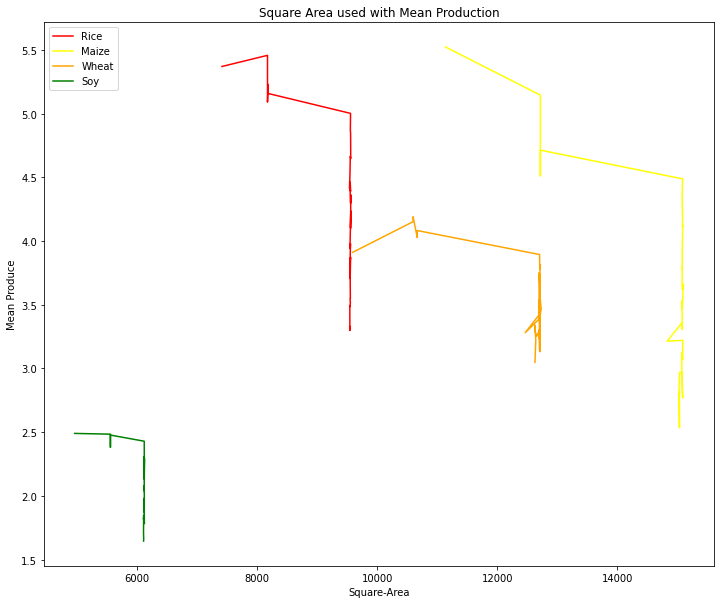

In [19]:
plt.figure(figsize=(12,10))
plt.plot(rice_df[1], rice_df[2], 'red', label = 'Rice')
plt.plot(maize_df[1], maize_df[2],  'yellow', label = 'Maize')
plt.plot(wheat_df[1], wheat_df[2],  'orange', label = 'Wheat')
plt.plot(soy_df[1], soy_df[2],  'green', label = 'Soy')

plt.xlabel('Square-Area')
plt.ylabel('Mean Produce')

plt.legend(loc = 'upper left')

plt.title('Square Area used with Mean Production')

Text(0.5, 1.0, 'Square Area used per year')

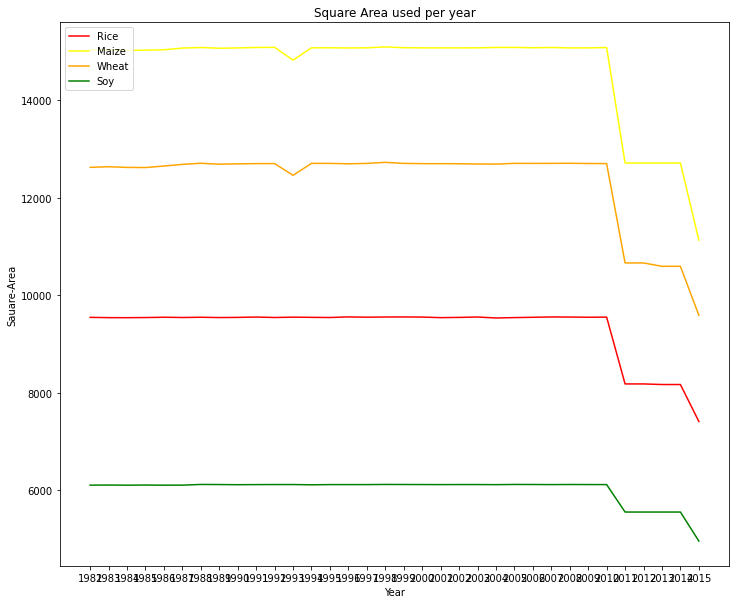

In [20]:
plt.figure(figsize=(12,10))
plt.plot(rice_df[0], rice_df[1], 'red', label = 'Rice')
plt.plot(maize_df[0], maize_df[1],  'yellow', label = 'Maize')
plt.plot(wheat_df[0], wheat_df[1],  'orange', label = 'Wheat')
plt.plot(soy_df[0], soy_df[1],  'green', label = 'Soy')

plt.xlabel('Year')
plt.ylabel('Sauare-Area')

plt.legend(loc = 'upper left')

plt.title('Square Area used per year')

The above charts indicates the amount of land being used has decreased since 1982 while the amount of food being produced has increased. This is supported by our earlier analysis. 

Below is a further tool for visualzing the same argument. 

Text(0.5, 1.0, 'Average Produce per Square-Area over Time')

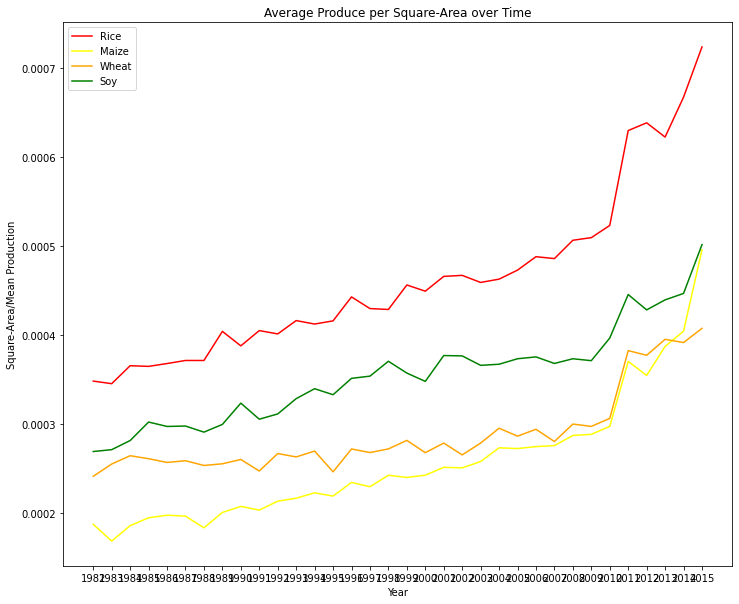

In [21]:
plt.figure(figsize=(12,10))
plt.plot(rice_df[0], (rice_df[2]/rice_df[1]), 'red', label = 'Rice')
plt.plot(maize_df[0], (maize_df[2]/maize_df[1]),  'yellow', label = 'Maize')
plt.plot(wheat_df[0], (wheat_df[2]/wheat_df[1]),  'orange', label = 'Wheat')
plt.plot(soy_df[0], (soy_df[2]/soy_df[1]),  'green', label = 'Soy')

plt.xlabel('Year')
plt.ylabel('Square-Area/Mean Production')

plt.legend(loc = 'upper left')

plt.title('Average Produce per Square-Area over Time')

Text(0.5, 1.0, 'Average Produce per Square-Area over Time')

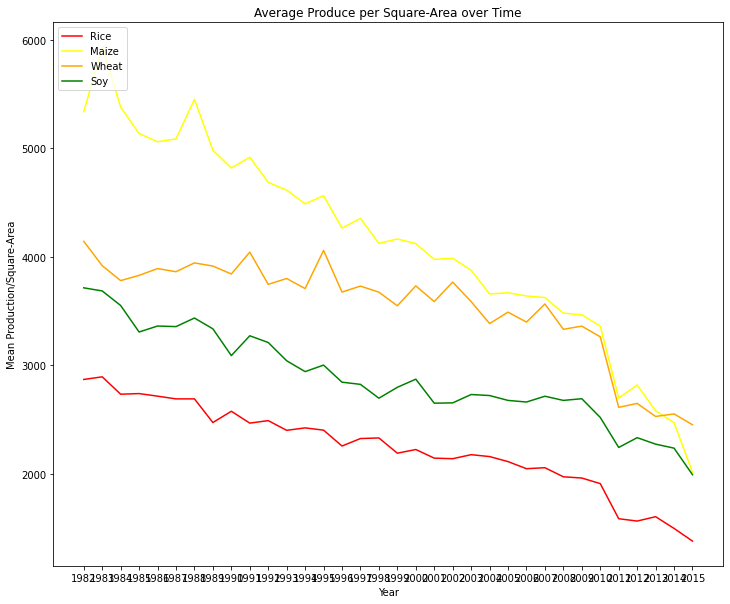

In [23]:
plt.figure(figsize=(12,10))
plt.plot(rice_df[0], (rice_df[1]/rice_df[2]), 'red', label = 'Rice')
plt.plot(maize_df[0], (maize_df[1]/maize_df[2]),  'yellow', label = 'Maize')
plt.plot(wheat_df[0], (wheat_df[1]/wheat_df[2]),  'orange', label = 'Wheat')
plt.plot(soy_df[0], (soy_df[1]/soy_df[2]),  'green', label = 'Soy')

plt.xlabel('Year')
plt.ylabel('Mean Production/Square-Area')

plt.legend(loc = 'upper left')

plt.title('Average Produce per Square-Area over Time')

These are arguably the best visualizations. They allows us to see the ratio of land used to food produced over time. In the first formulation, we see a positive correlation and can say that the amount of food being produced on a given piece of land has increased. If we inverse the ratio, we can say the amount of land used to produce a given amount of food has decreased.

Both exemplify the same point, but it is worth considering the impact of each on the audience and the tone we will finally want to use when presenting the data. 

Next, we check for normality of the square-area distibution by looking at the skew, kurtosis, and results of a Shapiro-Wilks test.

The kurtosis for the square-area falls outside the acceptable +/- 3 range and indicated non-normality for soy and maize, and falls on the line of acceptable vlaues for wheat and rice. The Shapiro test confirms this finding. 

In [ ]:
print('soy descriprion: {}'.format(stats.describe(soy_df[1])))
print('wheat descriprion: {}'.format(stats.describe(wheat_df[1])))
print('rice descriprion: {}'.format(stats.describe(rice_df[1])))
print('maize descriprion: {}'.format(stats.describe(maize_df[1])))

soy descriprion: DescribeResult(nobs=34, minmax=(4961, 6123), mean=6018.235294117647, variance=68479.0944741533, skewness=-2.6518243857629575, kurtosis=6.542950303852827)
wheat descriprion: DescribeResult(nobs=34, minmax=(9593, 12731), mean=12352.64705882353, variance=688892.7807486631, skewness=-2.1664973007410575, kurtosis=3.150748357437954)
rice descriprion: DescribeResult(nobs=34, minmax=(7415, 9560), mean=9327.35294117647, variance=314921.7504456328, skewness=-2.214489031869901, kurtosis=3.4237225685836137)
maize descriprion: DescribeResult(nobs=34, minmax=(11135, 15099), mean=14673.235294117647, variance=980244.7914438503, skewness=-2.295478361875523, kurtosis=4.019560340570535)


The p-vlaue from the null that the count of square-areas are normally distributed. The conclusion is that no crop uses a similar distribution of land.This also means we will need to use nonparametric tests.

In [ ]:
print('soy sharpio: {}'.format(stats.shapiro(soy_df[1])))
print('wheat sharpio: {}'.format(stats.shapiro(wheat_df[1])))
print('rice sharpio: {}'.format(stats.shapiro(rice_df[1])))
print('maize sharpio: {}'.format(stats.shapiro(maize_df[1])))

soy sharpio: (0.4506005048751831, 3.7427494437025643e-10)
wheat sharpio: (0.4827563762664795, 8.2083079222528e-10)
rice sharpio: (0.45455968379974365, 4.115698892803721e-10)
maize sharpio: (0.47074878215789795, 6.099095672951194e-10)


(array([ 1.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([7415. , 7629.5, 7844. , 8058.5, 8273. , 8487.5, 8702. , 8916.5,
        9131. , 9345.5, 9560. ]),
 <a list of 10 Patch objects>)

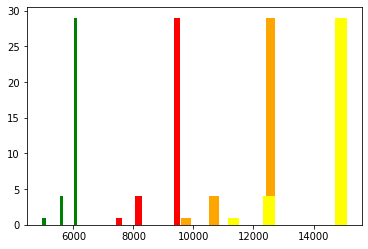

In [ ]:
plt.hist(soy_df[1], color='green')
plt.hist(wheat_df[1], color='orange')
plt.hist(maize_df[1], color='yellow')
plt.hist(rice_df[1], color='red')

Next, we use a Kruskal test to check if the difference seen in the Shapiro test is incorrect. The incredible small p-value indicates that the observed difference are likly existent in the data. We reject the null and conclude that none of the crops have an equal median. 

In [ ]:
stats.kruskal(wheat_df[1], maize_df[1], rice_df[1], soy_df[1])

KruskalResult(statistic=125.22687996666691, pvalue=5.774904529200174e-27)

## Conclusion 
Good news! We have discovered that the amount of land being used to produce food has diminished while the amount of food being produced on that land is increasing. This is the first step in ensuring we do not have a land crisis in the coming future. 

A preliminary analysis indicates that an increased use of GMOs and improved agricultural techniques has helped reduce the amount of land needed to supply the same amount of food. 

There are still many concerns not addressed in this analysis. What are the nutrient demands of these crops? Are they sustainable? Is less land really being used for agriculture or is the land being using for some other crop not in this data? 

While our results our positive, we should accept them with cautious optimism. There are many unanswered questions worth further exploration.



